In [1]:
!pip install statsmodels
!pip install scikit-learn

In [66]:
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime


In [61]:
#load dataset
df=pd.read_csv('C:/classisificatn and regressin/shampoo.csv' ,header=0,parse_dates=True)


In [4]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [36]:
df.shape

(36, 2)

<Axes: >

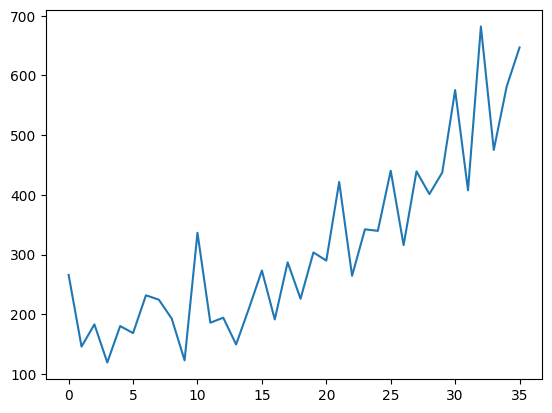

In [13]:
#we want to see the plot to know whether its a quadratic or linear plot
df['Sales'].plot()

### The above graph is a quadratic hence has a differencing order  2 and shows no seasonality.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

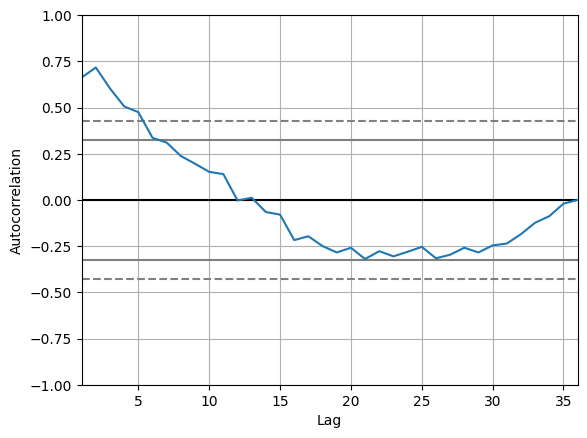

In [16]:
autocorrelation_plot(df['Sales'])

###We can see that the sales cut the confidence line(thats the dotted line above)at point lag about 5...hence our Q is 5

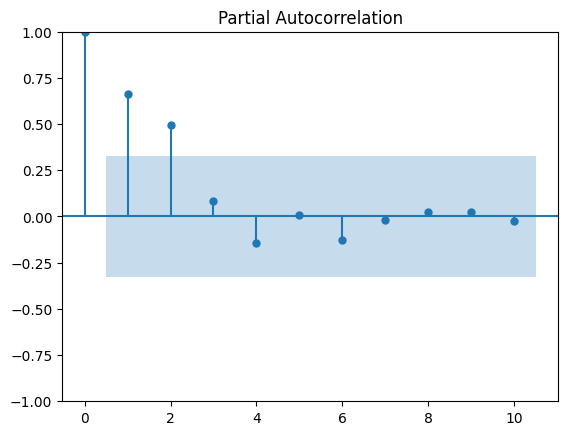

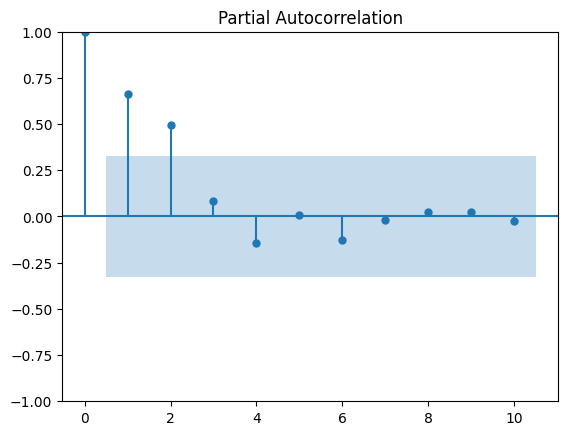

In [21]:
plot_pacf(df['Sales'],lags=10)

# to get order p we need to check the point where the pacf values goes below the confindence line and use the lagged values as p.hence p=2

In [27]:
model=ARIMA(df['Sales'],order=(2,2,5))

In [28]:
model_fit=model.fit()

C:\Users\maina\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [29]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 2, 5)   Log Likelihood                -189.635
Date:                Sat, 19 Oct 2024   AIC                            395.269
Time:                        16:59:26   BIC                            407.480
Sample:                             0   HQIC                           399.434
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9079      0.246     -7.741      0.000      -2.391      -1.425
ar.L2         -0.9544      0.219     -4.362      0.000      -1.383      -0.526
ma.L1         -0.0681     19.929     -0.003      0.997     -39.128      38.992
ma.L2         -1.8462      2.784     -0.663      0.507      -7.302       3.610
ma.L3          0.3025     19.875      0.015      0.988     -38.652      39.257
ma.L4          0.9883      2.815      0.351      0.726      -4.530       6.506
ma.L5         -0.1280      0.339     -0.377      0.706      -0.793       0.537
sigma2      2696.7220      0.014   1.94e+05      0.000    2696.695    2696.749
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.39   Prob(JB):                         0.92
Heteroskedasticity (H):               0.94   Skew:                            -0.01
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.39e+22. Standard errors may be unstable.
"""

##the smaller the variable[P>|z] the more important the variable is 

<Axes: >

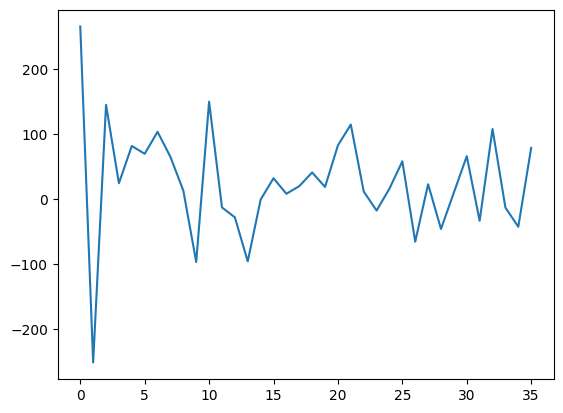

In [31]:
residuals=model_fit.resid
residuals.plot()

###the graph should have no trend or pattern,should show no information and should show white noise thats like randomly distributed

In [32]:
residuals.describe()

count     36.000000
mean      25.166727
std       86.508082
min     -251.672144
25%      -14.152647
50%       19.387671
75%       72.115313
max      266.000000
dtype: float64

#In ARIMA if you want to get MA model you use p=0 and if you want to get AR model use q=0

In [34]:
output=model_fit.forecast()
output

36    656.789009
dtype: float64

In [35]:
model_fit.forecast(15)

36     656.789009
37     637.271763
38     712.223779
39     710.394960
40     755.775665
41     784.366452
42     799.932512
43     856.374060
44     847.258932
45     924.208727
46     899.521899
47     986.607592
48     957.444395
49    1043.396580
50    1020.668502
Name: predicted_mean, dtype: float64

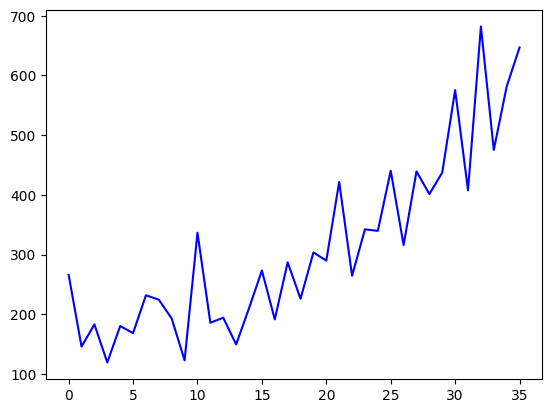

In [43]:
#Plot the actual data
pyplot.plot(df['Sales'], label='Actual', color='blue')


In [44]:
# Create an index for the forecast, continuing from the last index of the actual data
forecast_index = range(len(df), len(df) + 15)

In [46]:
# Forecast the next 15 periods
forecast = model_fit.forecast(15)

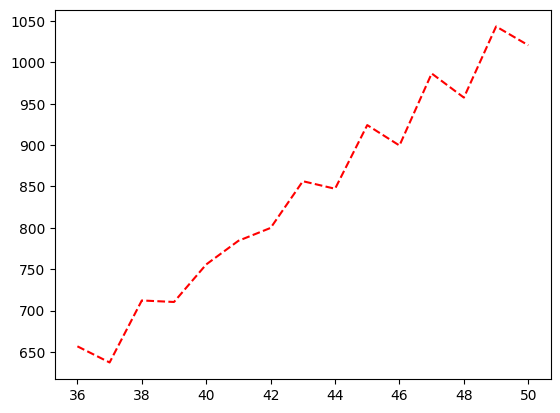

In [47]:
 #Plot the forecasted data
pyplot.plot(forecast_index, forecast, label='Forecast', color='red', linestyle='--')


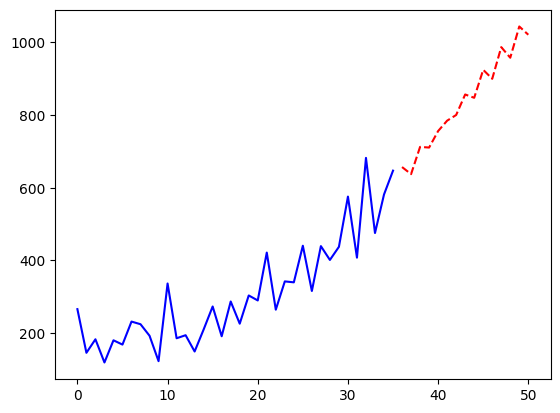

In [62]:
pyplot.plot(df['Sales'], label='Actual', color='blue')
pyplot.plot(forecast_index, forecast, label='Forecast', color='red', linestyle='--')

__ARIMA USING A WALK FoRWARD VALIDATIoN__

In [73]:
#load data
def parser(x):
  return datetime.strptime('190'+x,'%Y-%m')
series=pd.read_csv('C:/classisificatn and regressin/shampoo.csv' ,header=0,index_col=0,date_parser=parser,parse_dates=True) 
series.index=series.index.to_period('M')    

C:\Users\maina\AppData\Local\Temp\ipykernel_11356\4183901318.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series=pd.read_csv('C:/classisificatn and regressin/shampoo.csv' ,header=0,index_col=0,date_parser=parser,parse_dates=True)


In [74]:
series

,Sales
Month,
1901-01,266.0
1901-02,145.9
1901-03,183.1
1901-04,119.3
1901-05,180.3
1901-06,168.5
1901-07,231.8
1901-08,224.5
1901-09,192.8


In [107]:
#split into train and test
X=series.values# Get the values from the 'series'
size=int(len(X)*0.66)# Define the size of the training set as 66% of the total dataset
train,test=X[0:size],X[size:len(X)]# The first 66% of the data will be used for training, and the rest for testing
history=[x for x in train]# This will be used to keep track of observed data points (used to make predictions)
predictions=list()# Initialize an empty list to store the predictions made on the test set

In [108]:
#walk forward validation
for t in range(len(test)):
   model=ARIMA(history,order=(5,1,0))# Fit ARIMA model on the history (training data so far)
   model_fit=model.fit() 
    # Train (fit) the model on the history data
   output=model_fit.forecast()# Make one-step forecast (predict the next value)
   yhat=output[0]  # Retrieve the forecasted value (yhat is the predicted value)
   predictions.append(yhat)# Store the prediction for later evaluation 
   obs=test[t] # Get the actual observation from the test dataset
   history.append(obs)  # Add the observation to the history (so the model can learn from it)
print('predicted=%f, expected=%f' % (yhat, obs))   
    # Print the predicted value and the actual value for comparison    
    

predicted=531.541449, expected=646.900000


C:\Users\maina\AppData\Local\Temp\ipykernel_11356\2289891154.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


In [109]:
# Check the lengths before calculating RMSE
print(f'Length of test set: {len(test)}')
print(f'Length of predictions: {len(predictions)}')

# Ensure both lengths match
if len(test) == len(predictions):
    # Evaluate forecast
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)
else:
    print('Error: Test and predictions have different lengths.')


Length of test set: 13
Length of predictions: 13
Test RMSE: 89.021


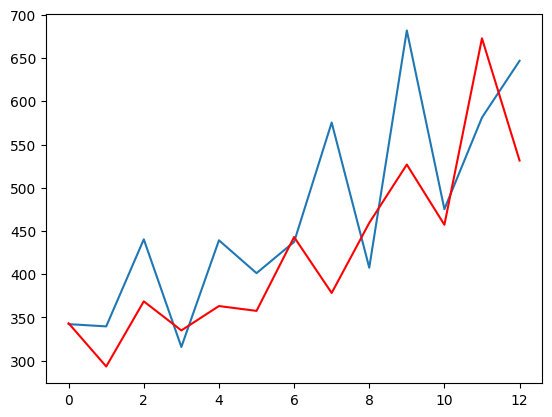

In [110]:
pyplot.plot (test)
pyplot.plot (predictions,color='red')
pyplot.show()